В этом небольшом домашнем задании мы попробуем улучшить метод Шерлока Холмса. Как известно, в рассказе The Adventure of the Dancing Men великий сыщик расшифровал загадочные письмена, которые выглядели примерно так:

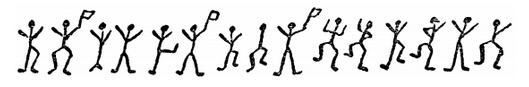

Пользовался он для этого так называемым частотным методом: смотрел, какие буквы чаще встречаются в зашифрованных текстах, и пытался подставить буквы в соответствии с частотной таблицей: E — самая частая и так далее.

В этом задании мы будем разрабатывать более современный и продвинутый вариант такого частотного метода. В качестве корпусов текстов для подсчётов частот можете взять что угодно, но для удобства вот вам “Война и мир” по-русски и по-английски:

https://www.dropbox.com/s/k23enjvr3fb40o5/corpora.zip 

In [1]:
import os
import re
import random
import numpy as np

from copy import copy
from collections import Counter, defaultdict
from nltk import everygrams
from nltk.tokenize import RegexpTokenizer

# Базовый частотный метод

Реализуйте базовый частотный метод по Шерлоку Холмсу:

- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
- расшифруйте их таким частотным методом.


In [2]:
corpus_dir = f"{os.curdir}/corpora"
corpus_files_ru = [file for file in os.listdir(corpus_dir) if 'Eng' not in file]
corpus_files_ru

['AnnaKarenina.txt', 'WarAndPeace.txt']

In [3]:
sentence_corpus = []
for textfile in corpus_files_ru:
    with open(os.path.join(corpus_dir, textfile), 'r', encoding='utf-8') as fin:
        sentence_corpus.extend(fin.readlines())

In [4]:
sentence_corpus[100:104]

['\n',
 'В романе Толстого все было современным: и общий замысел, и подробности. И все, что попадало в поле его зрения, приобретало обобщенный, почти символический характер. Например, железная дорога. Она была в те годы великим техническим новшеством, переворотившим все привычные представления о времени, пространстве и движении. Жизнь героев романа «Анна Каренина» так или иначе связана с железной дорогой. Однажды утренним поездом в Москву приехал Левин. На другой день, около полудня, из Петербурга приехала Анна Каренина. «Платформа задрожала, и, пыхая сбиваемым книзу от мороза паром, прокатился паровоз с медленно и мерно насупливающимся и растягивающимся рычагом среднего колеса…» Никто не мог теперь обойтись без железной дороги – ни светская дама из столицы, ни усадебный помещик.\n',
 '\n',
 'Железнодорожные станции с расходящимися в разные стороны лучами стальных путей были похожи на земные звезды. Сидя на звездообразном диване в ожидании поезда, Анна Каренина с отвращением глядела на

In [5]:
corpus =  " ".join(sentence_corpus)

In [6]:
# к сожалению, в библиотеке string есть только латинский алфавит, поэтому заведем свою строку
alphabet_ru = "абвгдежзийклмнопрстуфхцчшщъыьэюя "

In [7]:
def tokenize_text(text: str):
    tokenizer=RegexpTokenizer(r"\w+")
    text = "".join([c for c in text.lower() if c in alphabet_ru])
    return " ".join(tokenizer.tokenize(text))

In [8]:
def get_ngram_frequencies(text: str, n_gram=1):
    if n_gram > 1:
        text = ["".join(ngram) for ngram in everygrams(text, min_len=n_gram, max_len=n_gram)]
    frequency_dict = {k: v / len(text) for k, v in Counter(text).items() if v > 0}
    return frequency_dict

In [9]:
tokenized_corpus = tokenize_text(corpus)
corpus_freqs = get_ngram_frequencies(tokenized_corpus, n_gram=1)

In [10]:
# определим случайную перестановку
original_order = list(corpus_freqs.keys())
permutated_order = np.random.choice(original_order, replace=False, size=len(corpus_freqs))
permutation = {or_char: perm_char for or_char, perm_char in zip(original_order, permutated_order)}
permutation[' '] = ' '

In [11]:
def encode_text(text: str, permutation: dict):
    return "".join([permutation.get(char, '-') for char in text])

In [12]:
# Отдельное удовольствие - тестироваться на данных, на которых проходило обучение, поэтому возьмем
# абзац из входных данных
test_text = sentence_corpus[317]
test_text

'Степан Аркадьич не избирал ни направления, ни взглядов, а эти направления и взгляды сами приходили к нему, точно так же, как он не выбирал формы шляпы или сюртука, а брал те, которые носят. А иметь взгляды ему, жившему в известном обществе, при потребности некоторой деятельности мысли, развивающейся обыкновенно в лета зрелости, было так же необходимо, как иметь шляпу. Если и была причина, почему он предпочитал либеральное направление консервативному, какого держались тоже многие из его круга, то это произошло не от того, чтоб он находил либеральное направление более разумным, но потому, что оно подходило ближе к его образу жизни. Либеральная партия говорила, что в России все скверно, и действительно, у Степана Аркадьича долгов было много, а денег решительно недоставало. Либеральная партия говорила, что брак есть отжившее учреждение и что необходимо перестроить его, и действительно, семейная жизнь доставляла мало удовольствия Степану Аркадьичу и принуждала его лгать и притворяться, что

In [13]:
tokenized_text = tokenize_text(test_text)
encoded_text = encode_text(tokenized_text, permutation)
encoded_freqs = get_ngram_frequencies(encoded_text)
encoded_text

'нфсмег екъецщхп гс хбжхкей гх гемкелйсгхо гх лбюйоцэл е зфх гемкелйсгхо х лбюйоци недх мкхьэцхйх ъ гсдя фэпгэ феъ шс ъеъ эг гс лижхкей аэкди рйоми хйх нвкфяъе е жкей фс ъэфэкис гэноф е хдсфщ лбюйоци сдя шхлрсдя л хблснфгэд эжчснфлс мкх мэфксжгэнфх гсъэфэкэу цсофсйщгэнфх динйх кеблхлевчсуно эжиъгэлсггэ л йсфе бксйэнфх жийэ феъ шс гсэжьэцхдэ ъеъ хдсфщ рйомя снйх х жийе мкхпхге мэпсдя эг мксцмэпхфей йхжскейщгэс гемкелйсгхс ъэгнсклефхлгэдя ъеъэюэ цскшейхнщ фэшс дгэюхс хб сюэ ъкяюе фэ зфэ мкэхбэрйэ гс эф фэюэ пфэж эг геьэцхй йхжскейщгэс гемкелйсгхс жэйсс кебядгид гэ мэфэдя пфэ эгэ мэцьэцхйэ жйхшс ъ сюэ эжкебя шхбгх йхжскейщгео мекфхо юэлэкхйе пфэ л кэннхх лнс нълскгэ х цсунфлхфсйщгэ я нфсмеге екъецщхпе цэйюэл жийэ дгэюэ е цсгсю ксрхфсйщгэ гсцэнфелейэ йхжскейщгео мекфхо юэлэкхйе пфэ жкеъ снфщ эфшхлрсс япксшцсгхс х пфэ гсэжьэцхдэ мскснфкэхфщ сюэ х цсунфлхфсйщгэ нсдсугео шхбгщ цэнфелйойе дейэ яцэлэйщнфлхо нфсмегя екъецщхпя х мкхгяшцейе сюэ йюефщ х мкхфлэкофщно пфэ жийэ феъ мкэфхлгэ сюэ гефякс

In [14]:
def get_decode_permutation(corpus_freqs, encoded_freqs):
    corpus_freqs_sorted = sorted(corpus_freqs.items(), key=lambda x: x[1], reverse=True)
    encoded_freqs_sorted = sorted(encoded_freqs.items(), key=lambda x: x[1], reverse=True)
    reverse_permutation = {}
    for char, freq in encoded_freqs_sorted:
        min_diff = 1.0 
        best_char = ''
        for corpus_char, corpus_freq in corpus_freqs_sorted:
            diff = abs(corpus_freq - freq)
            if diff < min_diff:
                best_char = corpus_char
                min_diff = diff

        reverse_permutation[char] = best_char
        corpus_freqs_sorted = [(char, freq) for char, freq in corpus_freqs_sorted if char != best_char]
    reverse_permutation[' '] = ' '
    return reverse_permutation


In [15]:
decoded_permutation = get_decode_permutation(corpus_freqs, encoded_freqs)

In [16]:
decoded_text = encode_text(encoded_text, decoded_permutation)
decoded_text

'виемнт нлундьаз те айыалнс та тнмлнрсетаб та рйгсбдор н щиа тнмлнрсетаб а рйгсбдч внпа млацодаса у тепя иозто ину хе уну от те рчыалнс фолпч эсбмч аса вюлияун н ылнс ие уоиолче товби н апеиь рйгсбдч епя харэепя р айревитоп оыъевире мла моилеытовиа теуоиолош дебиесьтовиа пчвса лнйрарнюъешвб оычуторетто р сеин йлесовиа ычсо ину хе теоыцодапо уну апеиь эсбмя евса а ычсн млазатн мозепя от мледмозаинс саыелнсьтое тнмлнрсетае уотвелрниартопя унуого делхнсавь иохе птогае ай его улягн ио щио млоайоэсо те ои иого зиоы от тнцодас саыелнсьтое тнмлнрсетае ыосее лнйяптчп то моиопя зио ото модцодасо ысахе у его оылнйя хайта саыелнсьтнб мнлиаб гороласн зио р ловваа рве вурелто а дешвираиесьто я виемнтн нлундьазн досгор ычсо птого н детег леэаиесьто тедовинрнсо саыелнсьтнб мнлиаб гороласн зио ылну евиь оихарэее язлехдетае а зио теоыцодапо мелевилоаиь его а дешвираиесьто вепештнб хайть довинрсбсн пнсо ядоросьвираб виемнтя нлундьазя а млатяхднсн его сгниь а млаиролбиьвб зио ычсо ину млоиарто его тнияле

Да, расшифровка очень далека от идеала

# Анализ частот биграмм

Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:

- подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
- проведите тестирование аналогично п.1, но при помощи биграмм.


In [18]:
corpus_freqs_bigramm = get_ngram_frequencies(tokenized_corpus, n_gram=2)
encoded_freqs_bigramm = get_ngram_frequencies(encoded_text, n_gram=2)

In [17]:
def get_decode_permutation_bigramm(corpus_freqs, encoded_freqs):
    corpus_freqs_sorted = sorted(corpus_freqs.items(), key=lambda x: x[1], reverse=True)
    encoded_freqs_sorted = sorted(encoded_freqs.items(), key=lambda x: x[1], reverse=True)
    reverse_permutation = {}
    
    # Теперь нужно сделать то же самое, что в п. 1, только для биграмм
    # и учитывая уже расшифрованные символы
    for i, (encoded_ngram, encoded_freq) in enumerate(encoded_freqs_sorted):
        filtered_freqs = copy(corpus_freqs_sorted)

        for j in range(2):
            if encoded_ngram[j] in reverse_permutation:
                filtered_freqs = [(ngram, freq) for ngram, freq in filtered_freqs
                                   if ngram[j] == reverse_permutation[encoded_ngram[j]]]
        min_diff = 1.0  
        best_ngram = None
        for ngram, freq in filtered_freqs:
            diff = abs(freq - encoded_freq)
            if diff < min_diff:
                best_ngram = ngram
                min_diff = diff
        for j in range(2):
            if encoded_ngram[j] not in reverse_permutation:
                reverse_permutation[encoded_ngram[j]] = best_ngram[j]
    reverse_permutation[' '] = ' '
    return reverse_permutation

In [19]:
decoded_permutation_bigramm = get_decode_permutation_bigramm(corpus_freqs_bigramm, encoded_freqs_bigramm)

In [20]:
decoded_text_bigramm = encode_text(encoded_text, decoded_permutation_bigramm)
decoded_text_bigramm

' вавяп яотяслач па автаояп па пявояипапаь па ивгпьсои я лва пявояипапаь а ивгпьсв  яна воахосапа т панл вочпо вят  а тят оп па ивтаояп шоонв мпьвв апа  ковлтя я тояп ва товоова по ьв я анавл ивгпьсв анл  аиманл и авиа впон отпа виа воа вовоатпо ва патовооов саьваплпо ва нв па оявиаиякпав ь отвтпоиаппо и павя воапо ва твпо вят  а паотхосано тят анавл мпьвл а па а твпя воачапя вочанл оп воасвочавяп патаояплпоа пявояипапаа топ аоияваипонл тятого сао япа л во а нпогаа ав аго толгя во лво вооавомпо па ов вого чвот оп пяхосап патаояплпоа пявояипапаа топаа оявлнпвн по вовонл чво опо восхосапо тпа а т аго отоявл  авпа патаояплпяь вяоваь гоиооапя чво и оо  аа и а  тиаопо а сав виаваплпо л  вавяпя яотяслачя сопгои твпо нпого я сапаг оамаваплпо пасо вяияпо патаояплпяь вяоваь гоиооапя чво тоят а вл ов аимаа лчоа сапаа а чво паотхосано ваоа вооавл аго а сав виаваплпо  анавпяь  авпл со вяипьпя няпо лсоиопл виаь  вавяпл яотяслачл а воапл сяпя аго пгявл а воавиооьвл ь чво твпо вят вооваипо аго пявлоа

На данном примере биграммы никак не помогли.

# MCMC-сэмплирование

Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:

- предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
- реализуйте и протестируйте его, убедитесь, что результаты улучшились


Воспользуемся следующим порядком действий:


1) Инициализируем перестановки, восстанавливаем текст и вычисляем логарифм правдоподобия $p_{curr}$

2) Меняем местами пару символов для перестановки

3) Восстанавливаем текст с новой перестановкой и вычисляем $p_{new}$

4) Принимаем новую перестановку с вероятностью $P={p_{new}/p_{curr}}$

5) Повторяем пункты 2-4


In [21]:
# обновим функцию - добавим сглаживание
def get_ngram_frequencies_mod(text, n_gram=2):
    vocab_size = len(set(text)) ** n_gram
    if n_gram > 1:
        text = ["".join(ngram) for ngram in everygrams(text, min_len=n_gram, max_len=n_gram)]
    frequency_dict = {k: (v + 1) / (len(text) + vocab_size) for k, v in Counter(text).items()}
    return frequency_dict

In [22]:
def get_text_probability(text: str, permutation: dict, freqs: dict, n_gram=2):
    decoded_text = encode_text(text, permutation)
    log_proba = 0.0
    for i in range(len(decoded_text) - n_gram):
        ngram = decoded_text[i : i + n_gram]
        ngram_proba = freqs.get(ngram, 1 / (len(text) + len(alphabet_ru) ** n_gram))
        log_proba += np.log(ngram_proba)
    return log_proba

In [23]:
def get_reverse_permutation_mcmc(encoded_text: str, freqs_corpus: dict,
                                 alphabet_encoded=alphabet_ru, alphabet_iter=alphabet_ru,
                                n_iter=10000, n_runs=10, n_gram=2):
    accept_count = 0
    best_reverse_permutation = None
    permutations = []
    best_log_likelihood = -np.inf
    
    for run in range(n_runs):
        alphabet_encoded = list(alphabet_encoded)
        alphabet_iter = list(alphabet_iter)
        reverse_permutation = {k: v for k, v in zip(alphabet_encoded, alphabet_iter[: len(alphabet_encoded)])}
        log_proba_current = get_text_probability(encoded_text, reverse_permutation,
                                                 freqs_corpus, n_gram=n_gram)
        for i in range(n_iter):
            alphabet_new = alphabet_iter[:]
            id_1, id_2 = np.random.choice(len(alphabet_new), replace=False, size=2)
            alphabet_new[id_1], alphabet_new[id_2] = (alphabet_new[id_2], alphabet_new[id_1],)
            reverse_permutation_new = {k: v for k, v
                                        in zip(alphabet_encoded, alphabet_new[: len(alphabet_encoded)])}
            log_proba_new = get_text_probability(encoded_text, reverse_permutation_new,
                                                  freqs_corpus, n_gram=n_gram)
            p_new = np.exp(log_proba_new - log_proba_current)
            if p_new > np.random.rand():
                accept_count += 1
                alphabet_iter = alphabet_new
                log_proba_current = log_proba_new
                reverse_permutation = reverse_permutation_new

        if log_proba_current > best_log_likelihood:
            best_log_likelihood = log_proba_current
            best_reverse_permutation = reverse_permutation_new
        permutations.append(reverse_permutation_new)
    best_reverse_permutation[' '] = ' '
    return best_reverse_permutation

In [24]:
freqs_corpus = get_ngram_frequencies_mod(tokenized_corpus, n_gram=2)

In [26]:
best_reverse_permutation = get_reverse_permutation_mcmc(encoded_text, freqs_corpus=freqs_corpus)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


In [27]:
decoded_text = encode_text(encoded_text, best_reverse_permutation)
decoded_text

'степан аркадь ч не  зб рал н  направлен я н  взглядов а эт  направлен я   взгляды сам  пр ход л  к неми точно так же как он не выб рал формы шляпы  л  сюртика а брал те которые носят а  меть взгляды еми ж вшеми в  звестном обществе пр  потребност  некоторой деятельност  мысл  разв вающейся обыкновенно в лета зрелост  было так же необход мо как  меть шляпи есл    была пр ч на почеми он предпоч тал л беральное направлен е консерват вноми какого держал сь тоже мног е  з его крига то это про зошло не от того чтоб он наход л л беральное направлен е более разимным но потоми что оно подход ло бл же к его образи ж зн  л беральная парт я говор ла что в росс   все скверно   действ тельно и степана аркадь ча долгов было много а денег реш тельно недоставало л беральная парт я говор ла что брак есть отж вшее ичрежден е   что необход мо перестро ть его   действ тельно семейная ж знь доставляла мало идовольств я степани аркадь чи   пр ниждала его лгать   пр творяться что было так прот вно его натире

Не идеально, но уже вполне читаемо

# Проверочное сообщение

Расшифруйте сообщение:

←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

In [25]:
encrypted_text = r"←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"

In [32]:
enc_freqs = get_ngram_frequencies(encrypted_text, n_gram=2)

corpus_freqs_sorted = sorted(corpus_freqs.items(), key=lambda x: x[1], reverse=True)
message_freqs_sorted = sorted(enc_freqs.items(), key=lambda x: x[1], reverse=True)

alphabet_corpus = "".join([c for c, _ in corpus_freqs_sorted])
alphabet_enc = "".join([c for c, _ in enc_freqs])
print(alphabet_corpus)
print(alphabet_enc)

 оеанитслвркдмупяьгыбзчжйшхюэцщфъ
←⇠⇒↟↹↷⇊↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟↹⇷⇛⇞↨↹←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛⇯↹⇒←↙⇷⇯⇞↨⇴↨⇈⇠⇯←↷⇠⇠↤←⇒⇯⇴⇛⇒⇙↹⇴⇠↟↹↲⇒⇒↹⇰⇴⇛←↤↝↹⇞←↨↷←⇯⇛⇴↤⇴↟⇌⇙⇯⇠↹↘↨⇛←⇞↹↟↹↲←⇆⇴


In [27]:
best_reverse_permutation = get_reverse_permutation_mcmc(encrypted_text, freqs_corpus=freqs_corpus,
                                                        alphabet_encoded=alphabet_enc, alphabet_iter=alphabet_corpus)

In [28]:
decoded_text = encode_text(encrypted_text, best_reverse_permutation)
decoded_text

'евли сь сидине форкаляфьй или помни форкаляфьй не-вн - -но-о воо--ефи- -онорьй ле--о проминаня в-орее све-о сь све вделали прасиляфо и пол-мине ка-викаляфьй -алл -а повледфее менсерное -адафие --рва -он- -офемфо - фиме-о фе о-е-а-'

Как-то сложно назвать это хорошим переводом, но понять, где в реализации допущена ошибка, не удалось